   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
CustomerID                0
Gender                 

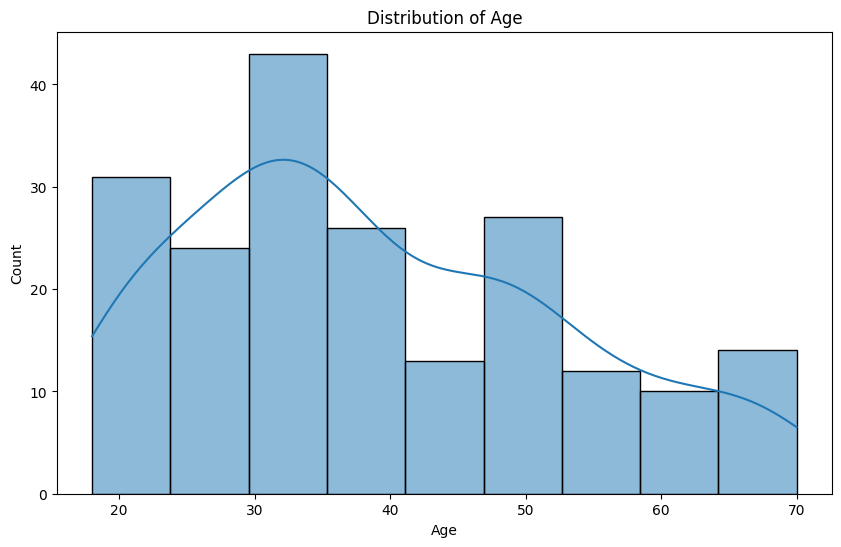

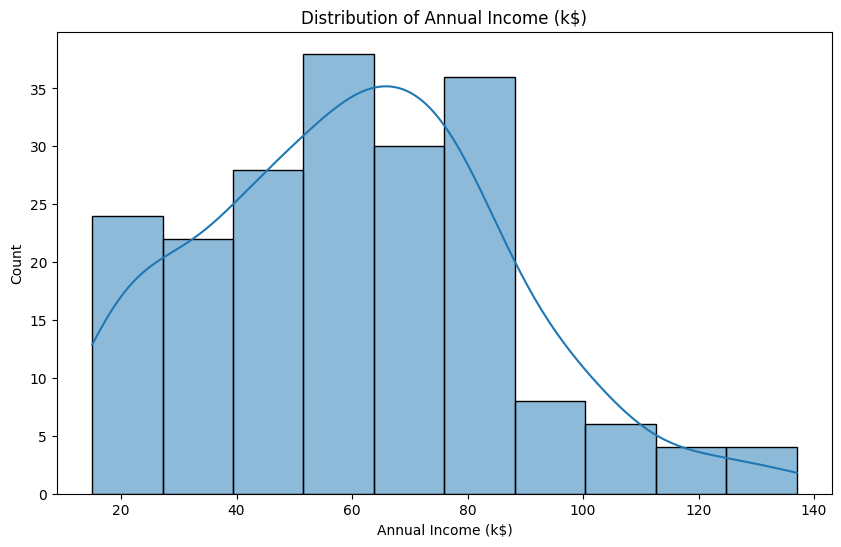

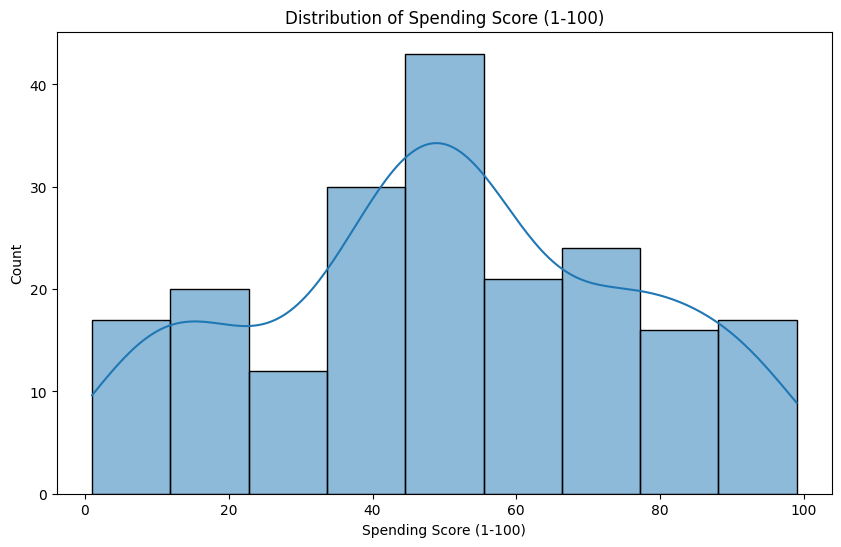

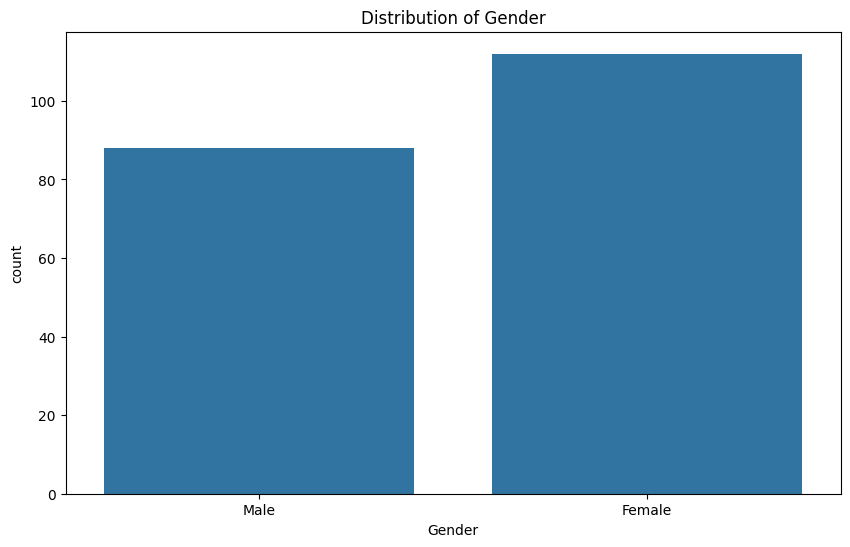

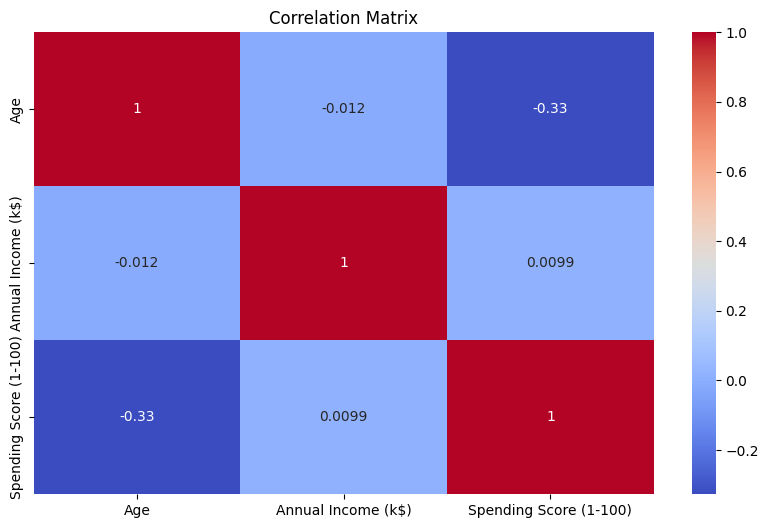

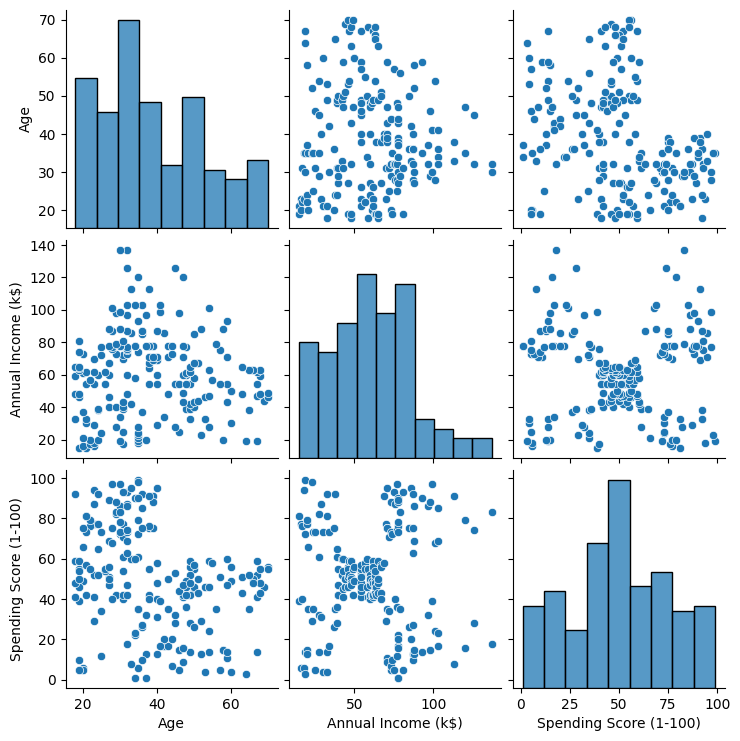

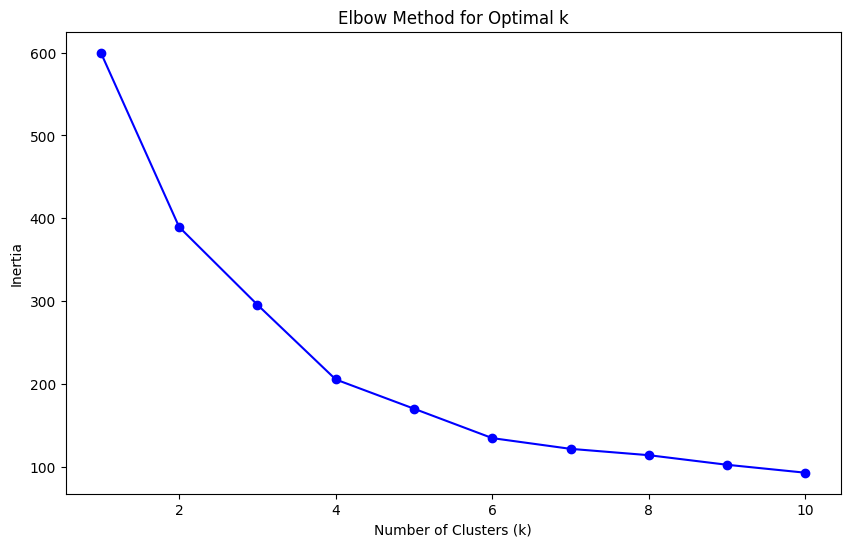

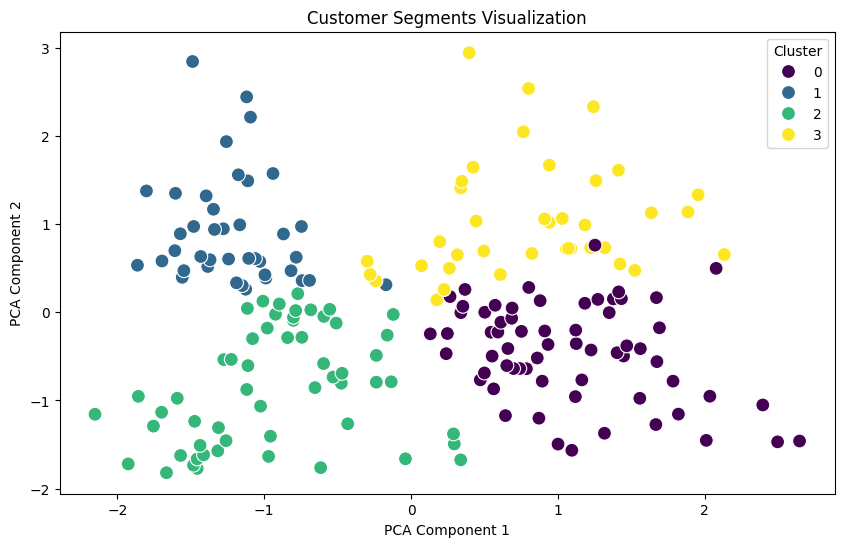

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Step 1: Load the dataset
file_path = 'D:\Customer Segmentation\Mall_Customers.csv'
df = pd.read_csv(file_path)

# Step 2: Initial exploration of the dataset
print(df.head())
print(df.info())
print(df.isnull().sum())  # Check for missing values

# Step 3: Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Step 4: Handle missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify that all missing values are handled
print(df.isnull().sum())

# Step 5: Drop the CustomerID column as it's not needed for modeling
df.drop(['CustomerID'], axis=1, inplace=True)

# Recalculate numerical columns after dropping CustomerID
numerical_cols = df.select_dtypes(include=['number']).columns

# Step 6: Exploratory Data Analysis (EDA)
# Distribution of numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical features
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pair plot for numerical features
sns.pairplot(df[numerical_cols])
plt.show()

# Step 7: Feature Engineering
# Example: Create a new feature based on existing ones (optional, modify as needed)
df['Income_Spending_Ratio'] = df['Annual Income (k$)'] / df['Spending Score (1-100)']

# Step 8: Normalize/Standardize the numerical features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Optionally, convert the scaled data back into a DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols)

# Step 9: Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method results
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 10: Apply K-Means clustering with the optimal number of clusters
# Assuming the elbow method suggests 4 clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Step 11: Visualize the clusters using PCA (dimensionality reduction)
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Step 12: Analyze the clusters (only on numerical data)
# Exclude categorical columns from the analysis
cluster_analysis = df.groupby('Cluster')[numerical_cols].mean()
print(cluster_analysis)


In [2]:
# Step 13: Interpret the cluster analysis
print("Cluster Analysis Results:")
print(cluster_analysis)

# You can also describe each cluster based on its mean values
for i in range(optimal_k):
    print(f"\nCluster {i} Description:")
    print(cluster_analysis.loc[i])


Cluster Analysis Results:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947

Cluster 0 Description:
Age                       53.984615
Annual Income (k$)        47.707692
Spending Score (1-100)    39.969231
Name: 0, dtype: float64

Cluster 1 Description:
Age                       32.875
Annual Income (k$)        86.100
Spending Score (1-100)    81.525
Name: 1, dtype: float64

Cluster 2 Description:
Age                       25.438596
Annual Income (k$)        40.000000
Spending Score (1-100)    60.298246
Name: 2, dtype: float64

Cluster 3 Description:
Age                       39.368421
Annual Income (k$)        86.500000
Spending Score (1-100)    19.578947
Name:

In [3]:
# Visualize the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

for i in range(optimal_k):
    print(f"Cluster {i} Center: {cluster_centers[i]}")


Cluster 0 Center: [53.98461538 47.70769231 39.96923077]
Cluster 1 Center: [32.875 86.1   81.525]
Cluster 2 Center: [25.43859649 40.         60.29824561]
Cluster 3 Center: [39.36842105 86.5        19.57894737]
